## 프레임 별 감정 분석

- Author
  - cheesecat47 <cheeseecat47@gmail.com>
- References
  - https://github.com/Moddy2024/ResNet-9/blob/main/prediction.ipynb


In [16]:
import os

import cv2
import matplotlib.pyplot as plt
import torch
from ai_face import detect_faces, extract_frames, get_default_device, predict, to_device
from resnet9 import ResNet9
from tqdm import tqdm

In [17]:
!pwd

/Users/mks/Documents/GitHub/AI/ipynb


In [18]:
BASE_PATH = "/Users/mks/Documents/GitHub/AI/ipynb"
VIDEO_PATH = os.path.join(BASE_PATH, "test_mov.mov")

In [19]:
frame_list = extract_frames(VIDEO_PATH)

Extract 6 images


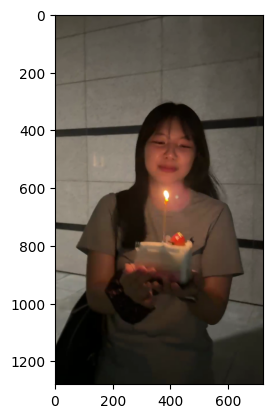

In [20]:
plt.imshow(frame_list[0])

### 검출기 로딩

- haar cascade


In [21]:
haar_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)
haar_cascade

< cv2.CascadeClassifier 0x16d97ea90>

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 123.99it/s]


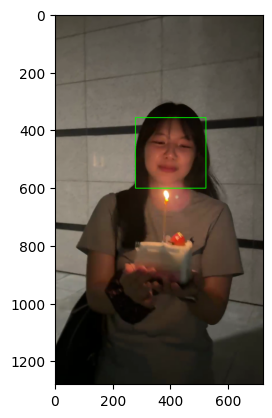

In [22]:
img_list = []
face_img_list = []

for img in tqdm(frame_list, total=len(frame_list)):
    img_box, face_img = detect_faces(img, (48, 48), haar_cascade)
    img_list.append(img_box)
    face_img_list.append(face_img)

plt.imshow(img_list[0])

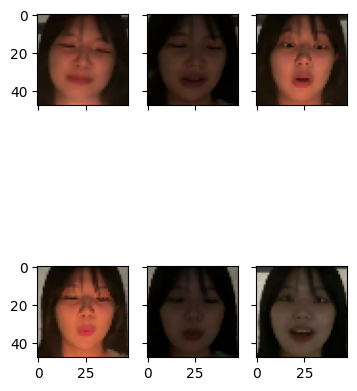

In [23]:
c = 3
r = len(face_img_list) // c

fig, axes = plt.subplots(r, c, figsize=(
    r * 2, c * 2), sharex=True, sharey=True)

i = -1
for img in face_img_list:
    i += 1
    if img is None:
        axes[i // c, i % c].text(24, 24, "Not detected",
                                 ha="center", va="center")
        continue

    axes[i // c, i % c].imshow(img)

plt.show()
plt.close(fig)

## 감정 분류


In [24]:
device = get_default_device()
device

device(type='mps')

### 모델

- ResNet9


In [25]:
MODEL_NAME = "ResNet9"

MODELS = {
    "ResNet9": "/Users/mks/Documents/GitHub/AI/model/ResNet9_epoch-50_score-0.8001.pth",
}

In [26]:
MODEL_PATH = MODELS[MODEL_NAME]
print(MODEL_PATH)

model = to_device(ResNet9(1, 7), device)
model.load_state_dict(torch.load(MODEL_PATH))
model.eval()
model

/Users/mks/Documents/GitHub/AI/model/ResNet9_epoch-50_score-0.8001.pth


/var/folders/_w/6twp845j1tsgpylfv57d8d2r0000gn/T/ipykernel_50771/3477689215.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(MODEL_PATH))

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(1, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(48, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(96, eps=1e-05, mom

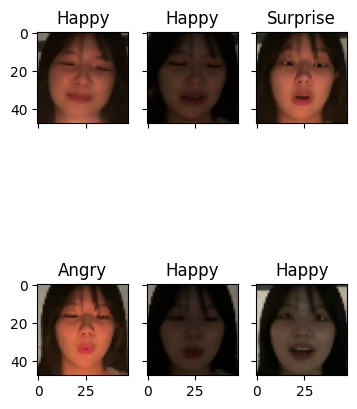

In [27]:
from PIL import Image

c = 3
r = len(face_img_list) // c

fig, axes = plt.subplots(r, c, figsize=(r * 2, c * 2), sharex=True, sharey=True)

i = -1
for img in face_img_list:
    i += 1
    if img is None:
        axes[i // c, i % c].text(24, 24, "Not detected", ha="center", va="center")
        continue
    axes[i // c, i % c].imshow(img)
    axes[i // c, i % c].set_title(predict(Image.fromarray(img), model, device))

plt.show()
plt.close(fig)